In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

In [2]:
def plot_series_data(df, col='non-wear_flag',
                     label='Worn (0 = Worn, 1 = Not Worn)',
                     title='Non-Wear Flag',
                     x_col='day_time', x_label='Day Relative to PCIAT + Time'):
    plt.figure(figsize=(18, 12))
    
    # ENMO
    plt.subplot(4, 1, 1)
    plt.scatter(df[x_col], df['enmo'], label='ENMO', color='green', s=1)
    plt.title('ENMO (Euclidean Norm Minus One)')
    plt.ylabel('Movement Intensity')

    # Angle Z
    plt.subplot(4, 1, 2)
    plt.scatter(df[x_col], df['anglez'], label='Angle Z', color='blue', s=1)
    plt.title('Angle Z')
    plt.ylabel('Angle (degrees)')

    # Light
    plt.subplot(4, 1, 3)
    plt.scatter(df[x_col], df['light'], label='Light', color='orange', s=1)
    plt.title('Ambient Light')
    plt.ylabel('Light (lux)')

    # Any other column
    plt.subplot(4, 1, 4)
    plt.scatter(df[x_col], df[col], label=col, color='red', s=1)
    plt.title(f'{title}')
    plt.ylabel(f'{label}')
    plt.xlabel(f'{x_label}')

    plt.tight_layout()
    plt.show()

In [3]:
train = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')

In [4]:
path = '/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=0417c91e/part-0.parquet'
series_train = pd.read_parquet(path)
series_train

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT
0,0,0.014375,-0.020112,-0.995358,0.001060,-88.445251,0.0,41.000000,4195.000000,44100000000000,2,2,5.0
1,1,0.014167,-0.023278,-0.996164,0.000289,-88.372200,0.0,41.000000,4194.833496,44105000000000,2,2,5.0
2,2,0.014036,-0.022964,-0.996320,0.000301,-88.356422,0.0,41.500000,4194.666504,44110000000000,2,2,5.0
3,3,0.013593,-0.022048,-0.996762,0.002278,-88.575943,0.0,37.500000,4194.500000,44115000000000,2,2,5.0
4,4,-0.061772,-0.065317,-0.973063,0.092321,-88.391273,0.0,55.666668,4199.000000,44780000000000,2,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287174,287174,-0.407433,0.091612,-0.377763,0.039733,-43.319416,0.0,7.000000,3695.000000,32875000000000,1,3,53.0
287175,287175,-0.703572,0.016187,0.159560,0.035980,14.121390,0.0,7.000000,3695.000000,32880000000000,1,3,53.0
287176,287176,-0.209607,-0.469700,0.636573,0.097799,44.998573,0.0,7.000000,3695.000000,32885000000000,1,3,53.0
287177,287177,-0.390378,0.284386,0.147654,0.057826,7.726313,0.0,7.000000,3695.000000,32890000000000,1,3,53.0


In [5]:
print(series_train.columns)  # Liệt kê tất cả các cột


Index(['step', 'X', 'Y', 'Z', 'enmo', 'anglez', 'non-wear_flag', 'light',
       'battery_voltage', 'time_of_day', 'weekday', 'quarter',
       'relative_date_PCIAT'],
      dtype='object')


1. **step**  
   An integer timestep for each observation within a series.

2. **X, Y, Z**  
   Parameters that represent the acceleration of the arm along the three axes of space. From this, it is possible to describe the movement of the person wearing the device.

3. **ENMO**  
   Stands for *Euclidean Norm Minus One* of the three values along the X, Y, and Z axes measured in terms of gravitational force (with negative values rounded to zero). From this value:
   - If `ENMO = 0`, it means the person is not moving.
   - A higher value indicates that the person is more active.

4. **angle-Z**  
   A parameter that indicates the position of the arm when wearing the device. Its value is the angle measured in the horizontal plane.

5. **non_wear_flag**  
   Indicates whether the user is wearing the0device:
   - `1`: The user is wearing th1 device.
   - `0`: The user is not wearing the device.

6. **light**  
   Indicates the ambient light intensity around the user. From this value, we can determine whether the user is active during the day or at night.

7. **battery_voltage**  
   Measures the battery voltage in millivolts (mV). While this value may not have a significant impact on the model, it could affect data collection (e.g., low battery might cause noise or errors).

8. **weekday**  
   Represents the day of the week:
   - `2`: Monday
   - `1`: Sunday

9. **quarter**  
   Corresponds to which quarter of the year it is (there are 4 quarters in a year).

10. **relative_date_PCIAT**  
    Represents the number of days since the PCIAT test was administered:
    - If this value is negative, it means the data was collected before the test took place.
k place.


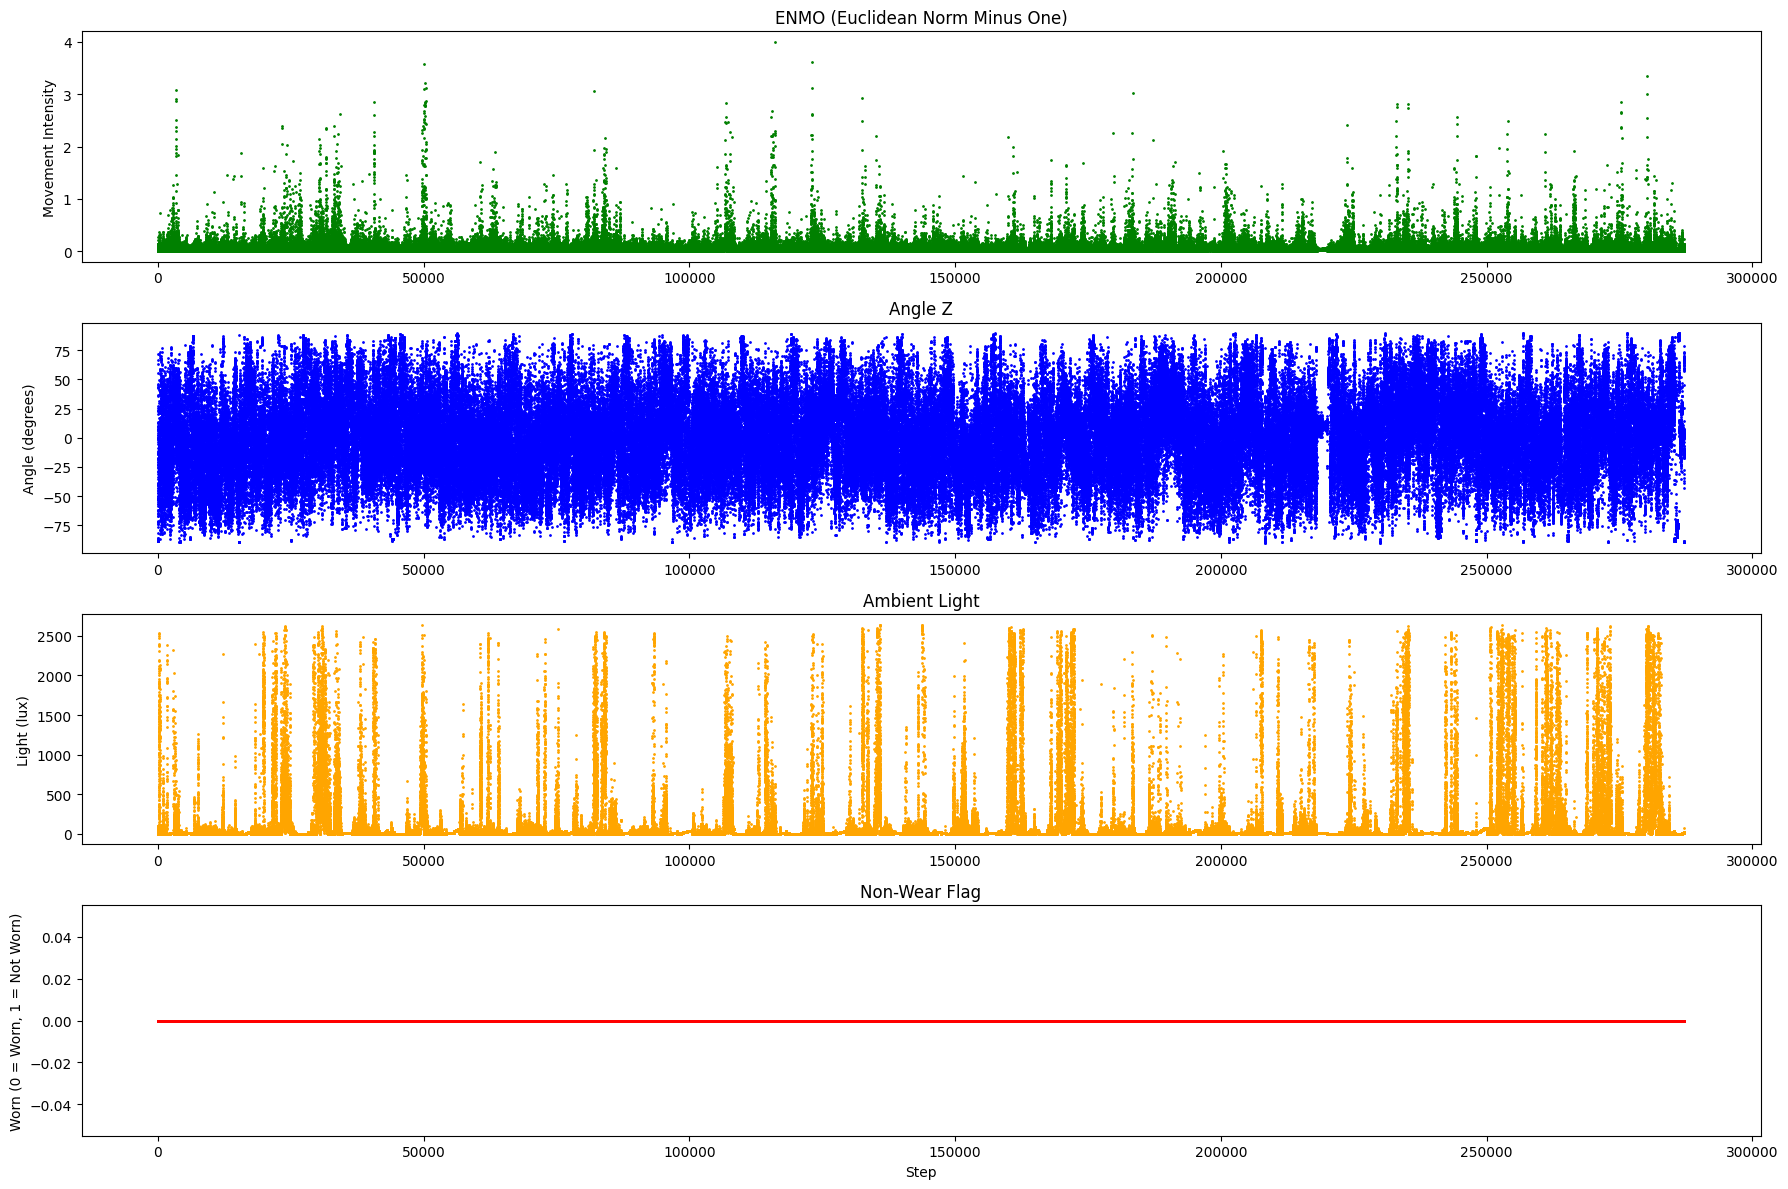

In [6]:
plot_series_data(series_train, x_col='step', x_label='Step')

### Observing Correlations with Step

Using **step** as the x-axis, we can observe the correlation between the following parameters:  
- **ENMO**  
- **angle-Z**  
- **light**  
- **non-wear_flag**

From the resulting chart:  
1. **Consistency of device usage**:  
   The user consistently wore the measurement device, as indicated by the **non-wear_flag** r0maining `1` throughout the observation period.  

2. **Device accuracy**:  
   The evenly spaced data points (1 step interval) suggest that the device is highly accurate in capturing measurements.

This chart provides solid evidence for the reliability of the device and its ability to measure movement and ambient factors effectively.


### Calculating Total Sequential Usage Time

We will calculate the **total sequential usage time** of the device by the user. From this, we can draw conclusions about the impact of device usage time on the measurement results.  

By converting `time_of_day` (in nanoseconds) into days and adding it to `relative_date_PCIAT` (the time since the PCIAT test started), we can determine the **total usage time** of the participant.  

### Key Points:
1. This calculation helps evaluate the relationship between **usage time** and measurement accuracy.  
2. The result can reveal potential biases or irregularities introduced by prolonged device usage.  
3. Any periods where `non_wear_flag` equals `0` should be excluded to ensure accurate calcultions.  
f the data collected.


In [7]:
series_train['time_of_day_hours'] = (
    series_train['time_of_day'] / 1e9 / 3600 #nanoseconds to hours
)
series_train['day_time'] = series_train['relative_date_PCIAT'] + (
    series_train['time_of_day_hours'] / 24
)
series_train['day_time']

0          5.510417
1          5.510475
2          5.510532
3          5.510590
4          5.518287
            ...    
287174    53.380498
287175    53.380556
287176    53.380613
287177    53.380671
287178    53.380729
Name: day_time, Length: 287179, dtype: float64

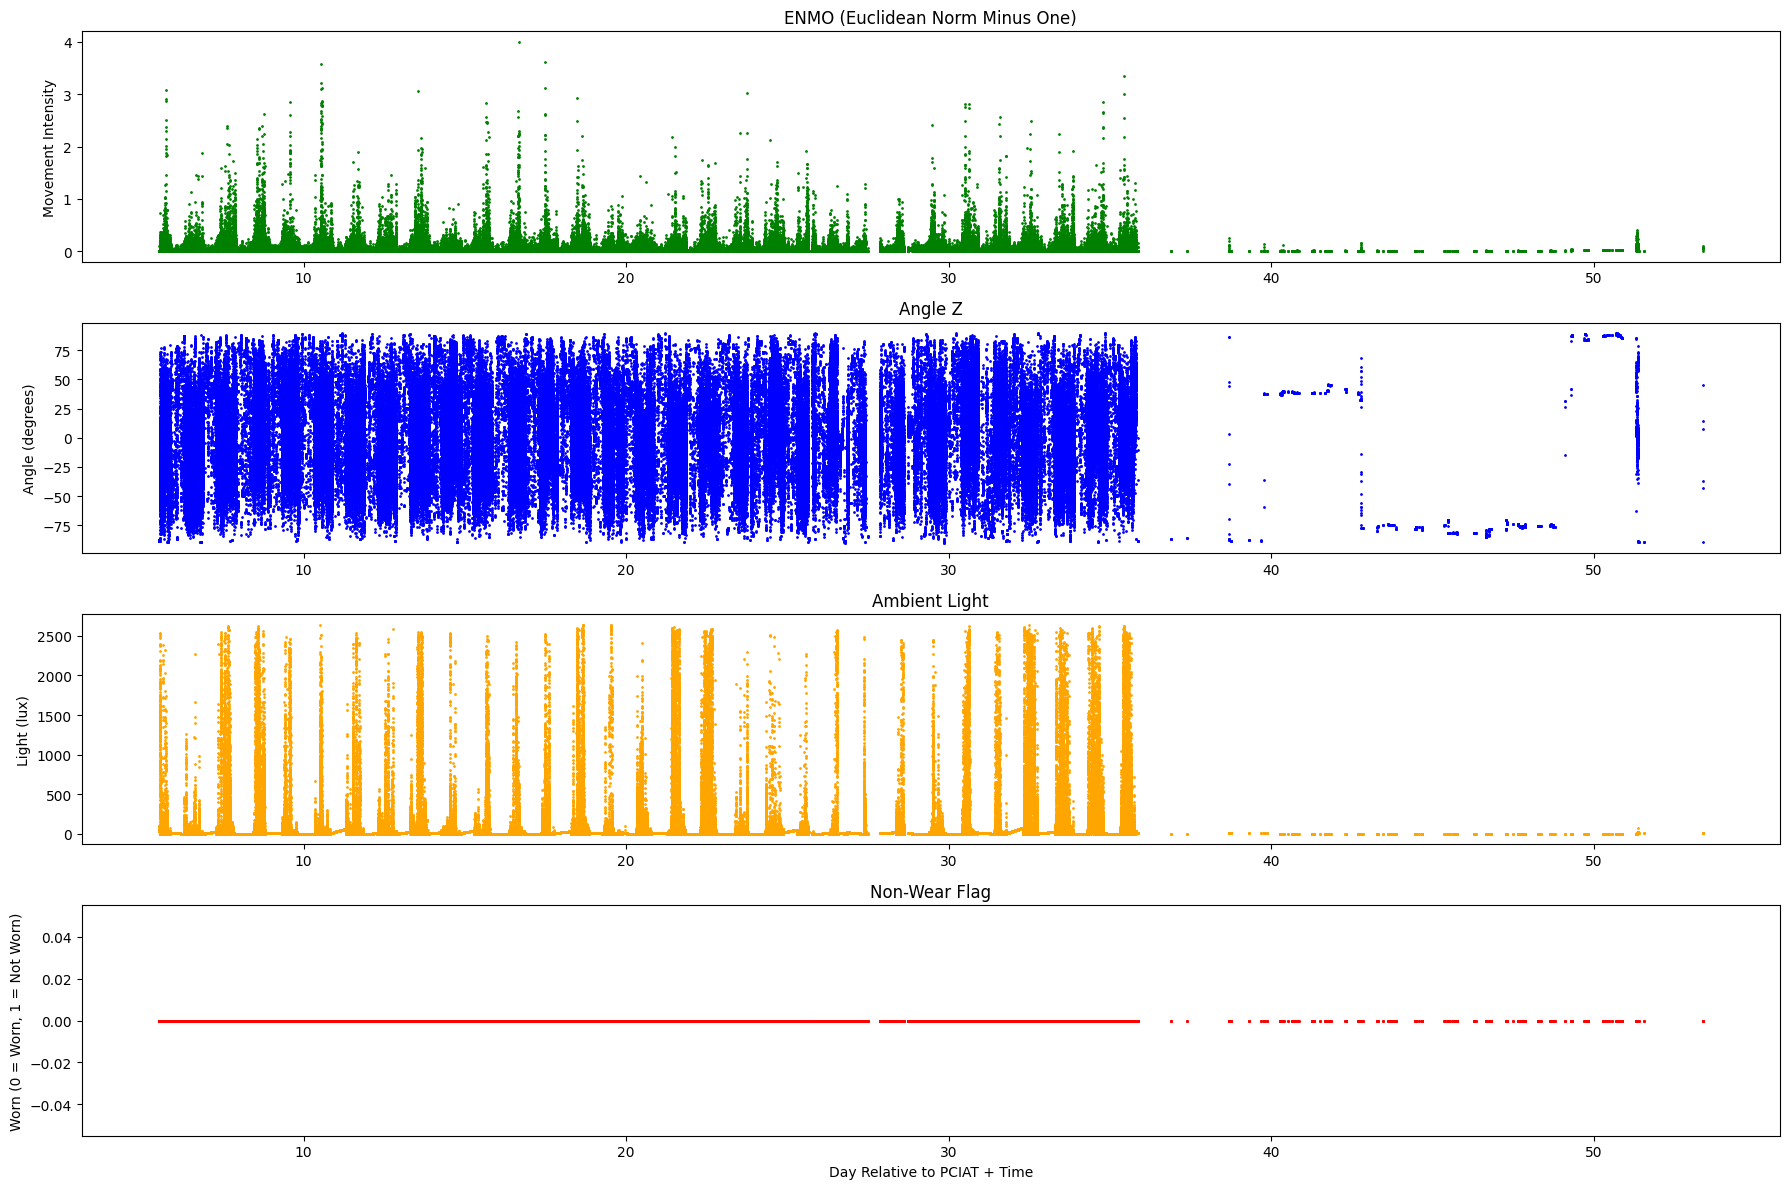

In [8]:
plot_series_data(series_train, x_col='day_time', x_label='Day Relative to PCIAT + Time')


In [9]:
len(series_train[series_train['relative_date_PCIAT'] > 35])

1834

From this chart, we observe that starting from around **day 35**, the collected information becomes sparse and scattered. This could be due to **device issues**, **test errors**, or a **reduced need for data collection**.  

Notably, there are only **1,834 measurements** during this period, compared to the total of **287,179 measurements**, which represents a very small fraction of the dataset.


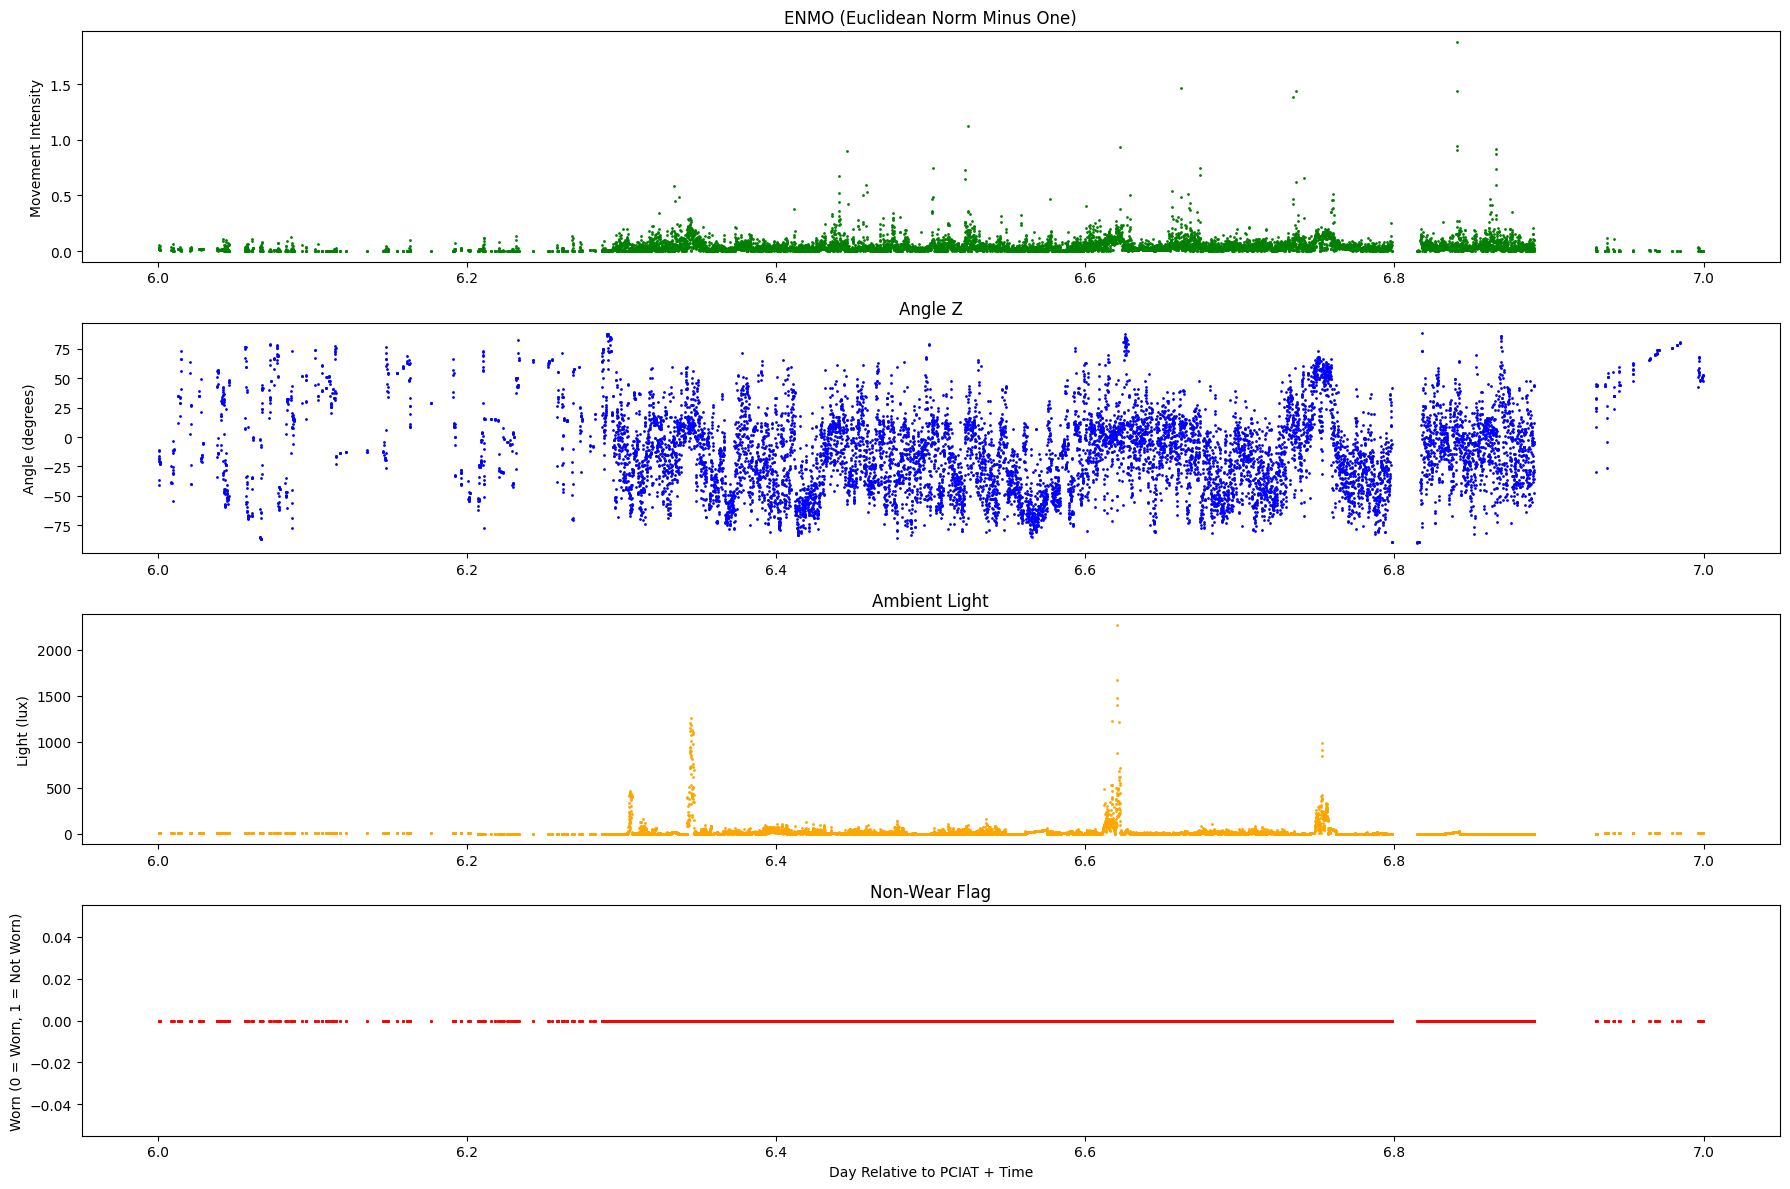

In [10]:
start_day = 2 # second day of wearing the device
show_days = 1

first_day = min(series_train['relative_date_PCIAT']) + start_day - 1
filtered_data = series_train[
    (series_train['relative_date_PCIAT'] >= first_day) &
    (series_train['relative_date_PCIAT'] <= first_day + show_days - 1)
].copy()

plot_series_data(filtered_data)

### Daily Activity Patterns

This chart provides an overview of activity levels throughout the day:  

- **Sleep Periods**:  
  The **left** and **right** sides of the chart likely represent the child's sleep periods, indicated by very low values for movement, angle, and light.  

- **Active Period**:  
  The child appears most active during the **middle of the day**, with consistent device usage observed throughout.  

- **General Trend**:  
  Most children exhibit **relatively low activity levels**, with only a small fraction of the data showing periods of high activity.  

This visualization highlights clear daily activity cycles, offering valuable insights into behs.
or patterns.
ty.


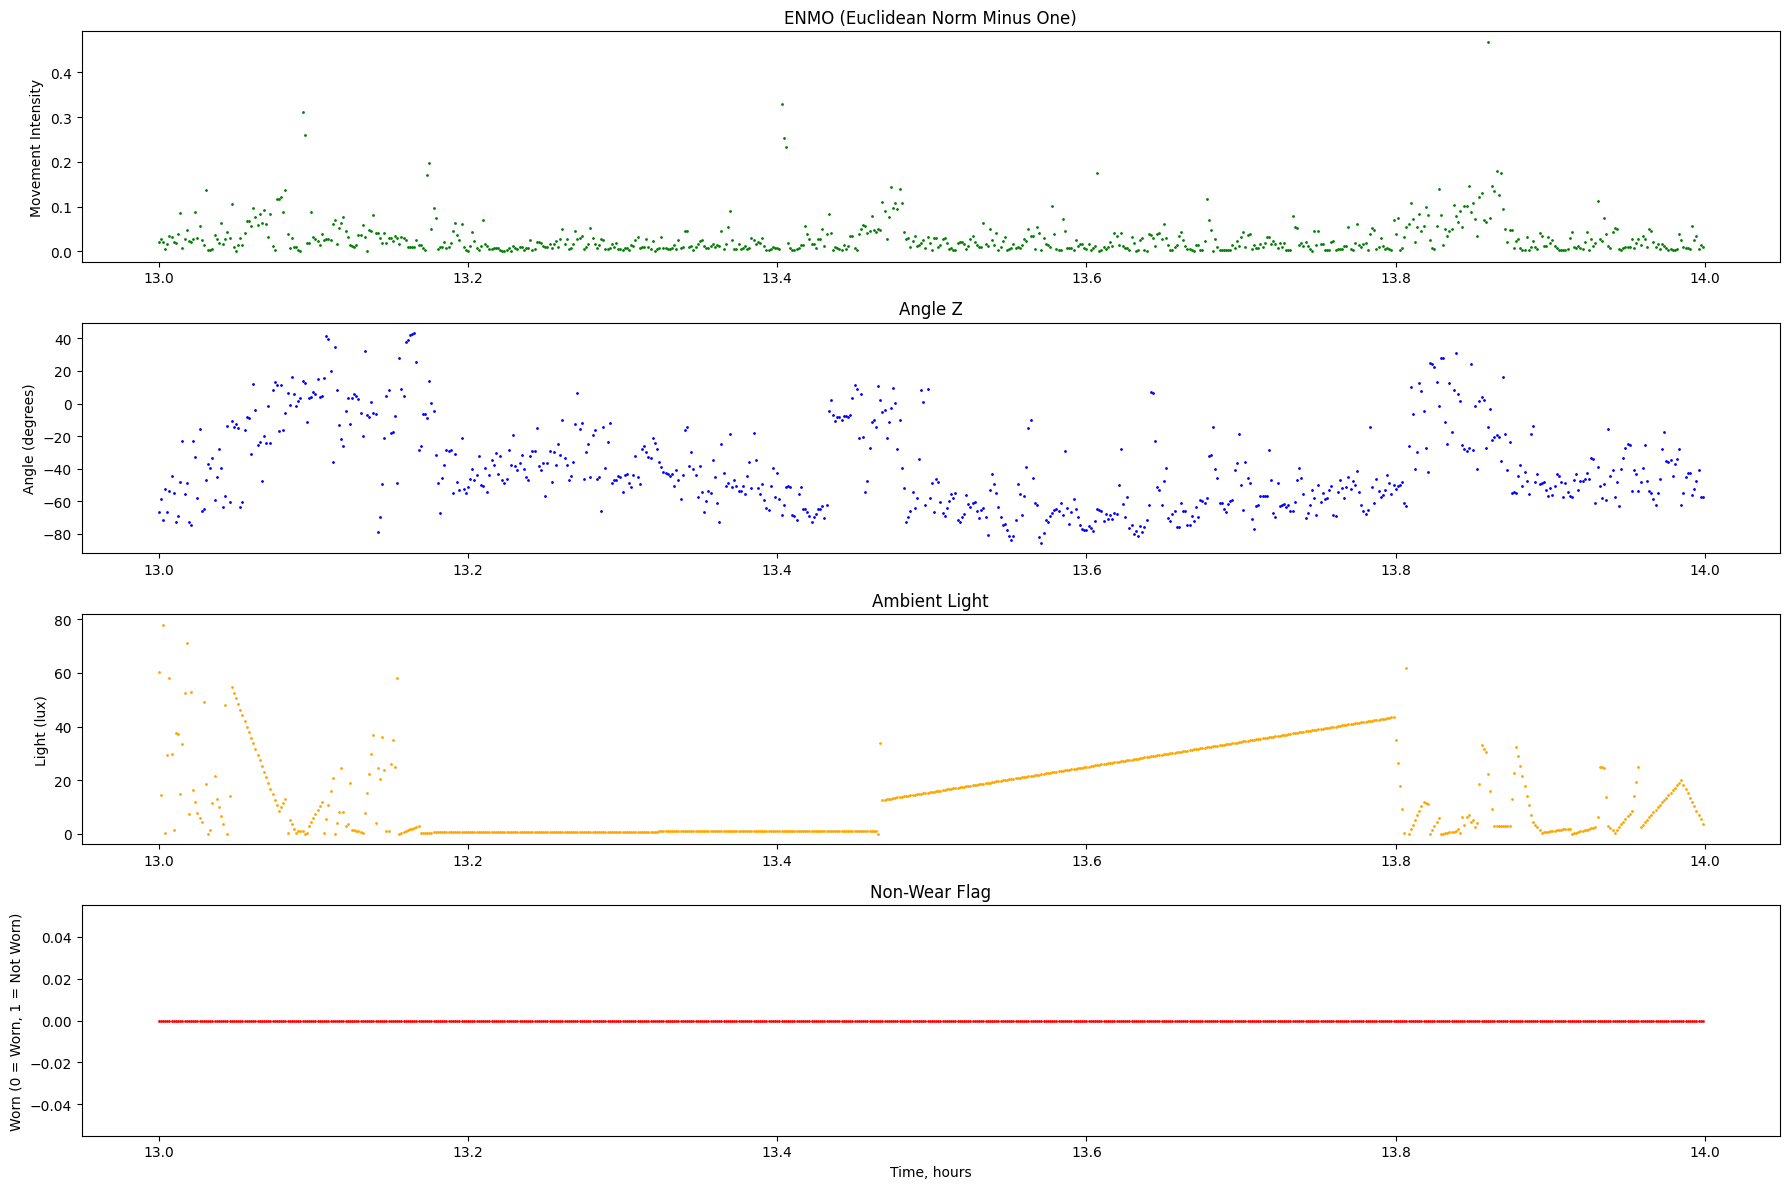

In [11]:
show_day = 2 # show second day
hour_from = 13 # starting from 1 pm
hour_to = 14 # to 2 pm

show_day = min(series_train['relative_date_PCIAT']) + show_day - 1
filtered_data = series_train[
    (series_train['relative_date_PCIAT'] == show_day) &
    (series_train['time_of_day_hours'] >= hour_from) & 
    (series_train['time_of_day_hours'] < hour_to)
].copy()

plot_series_data(filtered_data, x_col='time_of_day_hours', x_label='Time, hours')

### Observing Activity: 1 PM to 2 PM

We will analyze specific data for a fixed time frame between **1 PM and 2 PM**.  

- **ENMO Values**:  
  The ENMO values appear continuous, demonstrating that the device is functioning accurately and is sensitive enough to detect even the smallest movements. However, the **activity intensity** during this time frame is relatively **low**.  

- **Device Consistency**:  
  The child is wearing the device consistently throughout the observation period.  

- **Light Values**:  
  The light values are **scattered and inconsistent**, which may point to:  
  1. **Device sensor issues**  
  2. **Battery level fluctuations** potentially affecting the measurements  

This analysis highlights both the strengths and potential limitations of the device during this specific time frame.


In [12]:
day_start_hour = 8
day_end_hour = 21

series_train['day_period'] = np.where(
    (series_train['time_of_day_hours'] >= day_start_hour) &
    (series_train['time_of_day_hours'] < day_end_hour),
    'day', 'night'
)

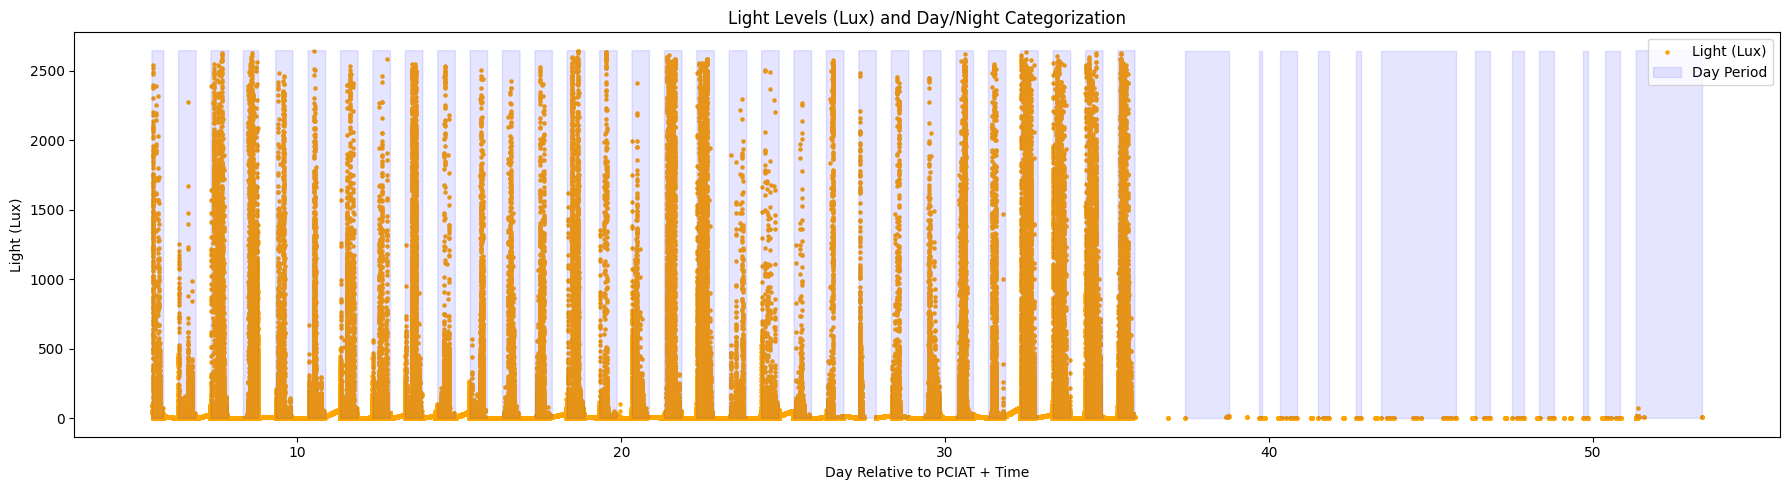

In [13]:
plt.figure(figsize=(18, 5))

plt.scatter(series_train['day_time'], series_train['light'], label='Light (Lux)', 
         color='orange', s=5)

plt.fill_between(series_train['day_time'],
                 0, series_train['light'].max(),
                 where=(series_train['day_period'] == 'day'),
                 color='blue', alpha=0.1, label='Day Period')

plt.title('Light Levels (Lux) and Day/Night Categorization')
plt.ylabel('Light (Lux)')
plt.xlabel('Day Relative to PCIAT + Time')
plt.legend()

plt.tight_layout()
plt.show()

### Light Intensity: Day vs. Night

This chart illustrates **light intensity** during two distinct periods:  
- **Daytime**: 8 AM to 9 PM  
- **Nighttime**: The remaining hours.  

#### Key Observations:  
1. **Accurate Detection**:  
   The device reliably detects light levels, showing **high intensity** during the day and **low intensity** at night.  

2. **Sensitivity**:  
   The device is sensitive enough to capture even **subtle changes** in light intensity, ensuring accurate and detailed measurements.  

This analysis demonstrates the device’s capability to differentiate between day and night with precision, reinforcing its reliability for light intensity tracking.


### Analyzing Time Differences in `time_diff` Column

We will analyze the **`time_diff`** column in the **`series_train`** dataframe to examine the time intervals between consecutive records (in seconds). The goal is to identify records where the time difference exceeds a predefined threshold value (**`expected_diff`**, set to 5 seconds).

- **Steps**:
  1. **Mark records**: Flag the records where the time difference is greater than the threshold (5 seconds).
  2. **Count occurrences**: Count how many records have a time difference greater than 5 seconds, and how many do not.
  
If a large number of records exceed the 5-second threshold, it may indicate a **gap** or **data loss** between measurements, suggesting potential issues with the data collection process.


In [14]:
expected_diff = 5

series_train['time_diff'] = (series_train['day_time'].diff() * 86400).round(0) # seconds in a day
series_train['measurement_after_gap'] = series_train['time_diff'] > expected_diff
series_train['measurement_after_gap'].value_counts()

measurement_after_gap
False    281762
True       5417
Name: count, dtype: int64

There are 5417 readings for this participant are off by more than 5 seconds.

In [15]:
series_train['time_diff'].describe()

count    287178.000000
mean         14.402200
std         523.719089
min           5.000000
25%           5.000000
50%           5.000000
75%           5.000000
max      156445.000000
Name: time_diff, dtype: float64

The largest timegap is 156,445.000000 seconds, which corresponds to more than 43 hours.








Then I calculate the percentage of rows with wear flag = 1 (device not worn) and the main statistics for key parameters for periods when the device was worn, ignoring time gaps, to get an idea of the values distributions.

In [16]:
DIR = '/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet'

def process_file(file_path, participant_id):
    data = pd.read_parquet(file_path)
    non_wear_percentage = (data['non-wear_flag'].sum() / len(data)) * 100
    worn_data = data[data['non-wear_flag'] == 0]

    return {
        'id': participant_id,
        'non_wear_percentage': non_wear_percentage,
        'enmo_stats': worn_data['enmo'].describe(),
        'anglez_stats': worn_data['anglez'].describe(),
        'light_stats': worn_data['light'].describe(),
        'battery_voltage_stats': worn_data['battery_voltage'].describe(),
        'unique_days': worn_data['relative_date_PCIAT'].nunique()
    }

results = []
for participant_id in os.listdir(DIR):
    file_path = os.path.join(DIR, participant_id, 'part-0.parquet')
    result = process_file(file_path, participant_id)
    results.append(result)

In [17]:
final_results = []
for result in results:
    flat_row = {
        'id': result['id'].replace('id=', ''),
        'non_wear_percentage': result['non_wear_percentage'],
        'unique_days': result['unique_days']
    }
    
    for key, stats in result.items():
        if isinstance(stats, pd.Series):
            for stat_name, stat_value in stats.items():
                flat_row[f'{key.replace("_stats", "")}_{stat_name}'] = stat_value
    
    final_results.append(flat_row)
    
stats_df = pd.DataFrame(final_results)
stats_df

,id,non_wear_percentage,unique_days,enmo_count,enmo_mean,enmo_std,enmo_min,enmo_25%,enmo_50%,enmo_75%,...,light_75%,light_max,battery_voltage_count,battery_voltage_mean,battery_voltage_std,battery_voltage_min,battery_voltage_25%,battery_voltage_50%,battery_voltage_75%,battery_voltage_max
0,0745c390,0.000000,37,50458.0,0.045252,0.132576,0.0,0.007953,0.019257,0.036048,...,24.750000,2626.199951,50458.0,4027.514893,108.451317,3829.000000,3958.000000,4029.000000,4146.000,4187.0
1,eaab7a96,4.650835,21,323849.0,0.030345,0.099080,0.0,0.000405,0.006128,0.021883,...,26.543808,2628.199951,323849.0,3825.719727,166.158646,3098.166748,3724.000000,3813.000000,3947.000,4146.0
2,8ec2cc63,0.000000,20,40003.0,0.056544,0.140594,0.0,0.005643,0.018467,0.048282,...,21.022933,2618.199951,40003.0,4106.425781,50.734318,3853.000000,4089.625000,4111.000000,4140.000,4183.0
3,b2987a65,0.000000,25,223915.0,0.053544,0.103401,0.0,0.009947,0.027653,0.057278,...,6.200000,2502.000000,223915.0,3958.604492,122.706802,3468.000000,3841.000000,3947.000000,4064.000,6000.0
4,7b8842c3,0.000000,35,15420.0,0.040399,0.090201,0.0,0.005364,0.024135,0.043690,...,4.942201,1046.800049,15420.0,3992.347656,126.121590,3815.083252,3837.333252,4000.000000,4087.000,4199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,cd68643b,0.548045,24,391431.0,0.038824,0.094089,0.0,0.001749,0.012130,0.039945,...,5.858469,2576.399902,391431.0,3850.750732,167.028320,3098.166748,3747.000000,3819.833252,3970.000,4191.0
992,f8ff0bc8,0.000000,23,1195.0,0.036847,0.068496,0.0,0.008236,0.024577,0.038638,...,19.533333,1526.599976,1195.0,4002.345703,166.620529,3829.000000,3835.000000,3964.000000,4181.000,4194.0
993,db23fbe4,22.233742,24,301058.0,0.035017,0.124221,0.0,0.000032,0.004363,0.019244,...,5.326250,2592.199951,301058.0,3865.329346,147.099747,3098.166748,3782.000000,3841.000000,3970.000,4175.0
994,687c85e7,0.000000,3,40085.0,0.037183,0.064660,0.0,0.009702,0.020775,0.039810,...,10.699164,1875.199951,40085.0,4123.798828,28.219002,4073.000000,4099.000000,4123.000000,4146.000,4183.0


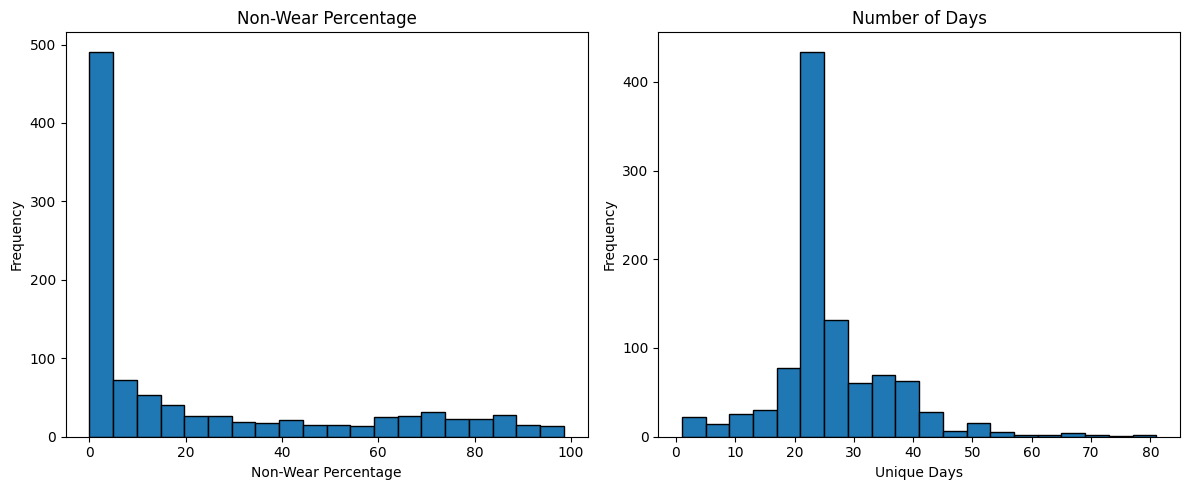

In [18]:
# non_wear_percentage
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(stats_df['non_wear_percentage'], bins=20, edgecolor='black')
plt.title('Non-Wear Percentage')
plt.xlabel('Non-Wear Percentage')
plt.ylabel('Frequency')

# unique_days
plt.subplot(1, 2, 2)
plt.hist(stats_df['unique_days'], bins=20, edgecolor='black')
plt.title('Number of Days')
plt.xlabel('Unique Days')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Analysis of Non-Wear Percentage and Unique Days

From these two charts, we can draw the following conclusions:

- **Non-Wear Percentage**:  
  The majority of values are concentrated around **0%**, indicating that most users consistently wore the device during the observation period.

- **Unique Days**:  
  - Most users wore the device consistently for up to **30 days**.  
  - Beyond day 30, there is a significant drop in the number of users still wearing the device.  
  - However, there are a few **exceptional cases** where users continued to wear the device for more than **80 days**.


In [19]:
stats_df[['non_wear_percentage', 'unique_days']].describe()

,non_wear_percentage,unique_days
count,996.000000,996.000000
mean,22.199020,25.892570
std,29.751492,9.950506
min,0.000000,1.000000
25%,0.000000,22.000000
50%,5.145835,24.000000
75%,39.636219,29.000000
max,98.515526,81.000000


### Overview of Variability Across Parameters

We will create simple plots to gain a general overview of the variability in the following statistical metrics:  
- **Minimum (min)**  
- **Maximum (max)**  
- **Median**  
- **Standard Deviation (std)**  

These metrics will be analyzed across key parameters:  
- **ENMO**  
- **Angle-Z**  
- **Light**  
- **Battery Voltage**  

By visualizing these metrics, we aim to understand how each parameter varies and identify any notable trends or patterns in the data.


In [20]:
def plot_parameter_statistics(stats_df, parameter):
    stats_to_plot = ['min', 'max', '50%', 'std']
    stat_labels = ['Min', 'Max', 'Median', 'Std']

    plt.figure(figsize=(14, 5))

    for j, stat in enumerate(stats_to_plot):
        plt.subplot(1, 4, j + 1)
        
        data = stats_df[f'{parameter}_{stat}']
        plt.hist(data, bins=20, alpha=0.7, edgecolor='black')
        
        plt.title(f'{parameter.capitalize()} - {stat_labels[j]}')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

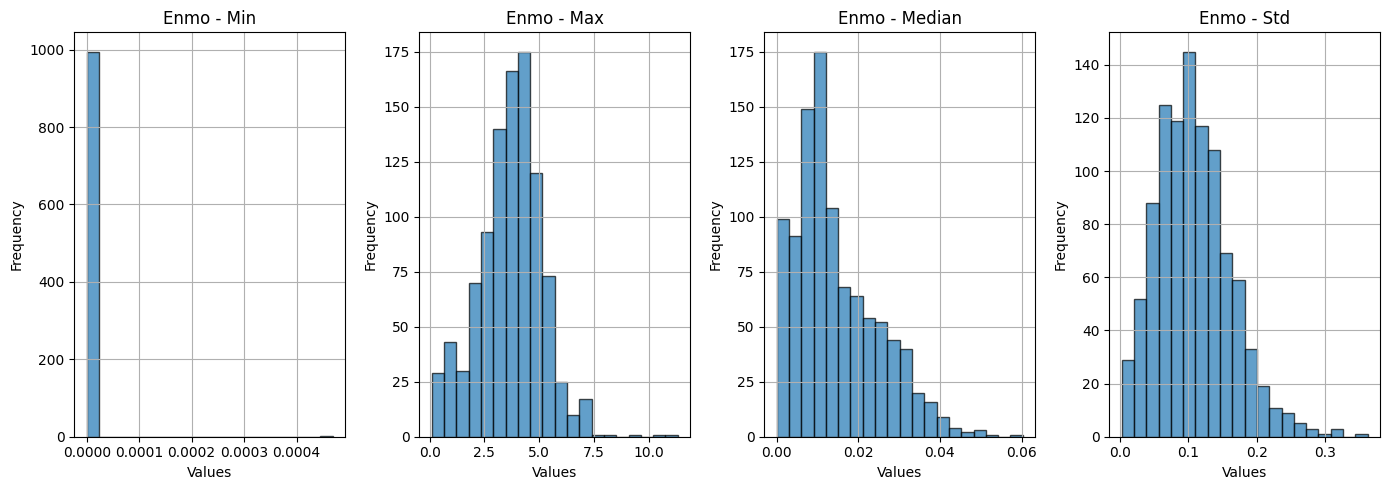

In [21]:
plot_parameter_statistics(stats_df, 'enmo')

### Analysis of Variability in Minimum and Maximum Charts

From the charts, we can infer the following:

- **Minimum Chart**:  
  - Most minimum values are **0**, indicating periods when the user was either sleeping or completely inactive.  
  - However, in some cases, the minimum **ENMO** value is **different from 0**, suggesting two possibilities:  
    1. The individuals were constantly moving, even during sleep.  
    2. The device might be **overly sensitive** to minor spatial changes.  

- **Maximum Chart**:  
  - Most maximum values fall within the range of **2-6**, which aligns with expected activity levels during periods of movement.  
  - However, there are a few cases where the maximum value is **close to 0**. This could imply that these individuals did not move at all, raising the question:  
    - Could this indicate a **malfunction in the measurement device**?


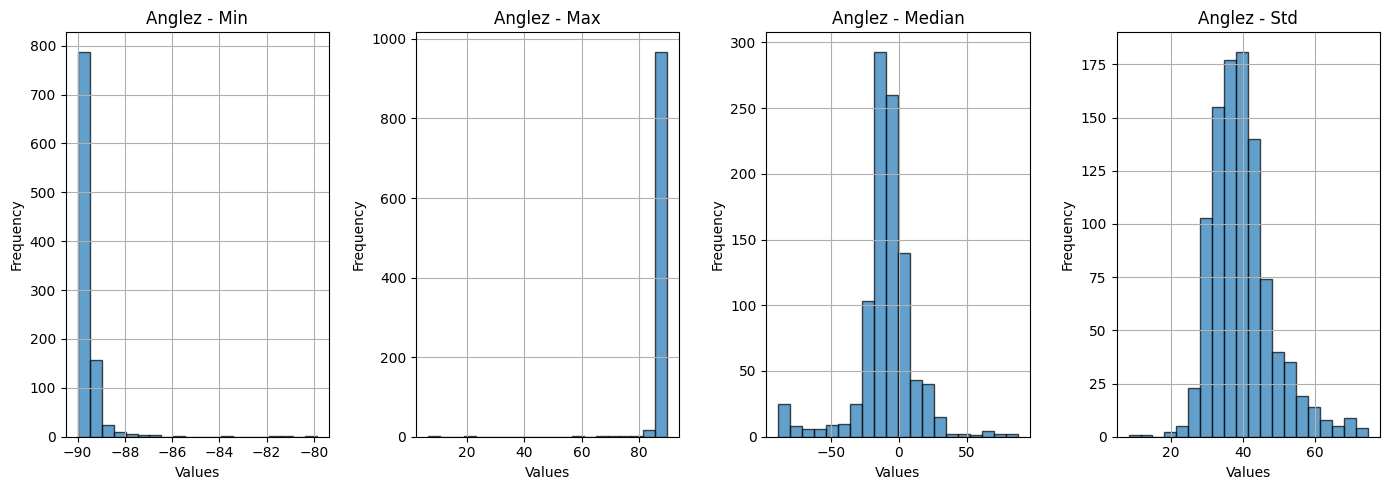

In [22]:
plot_parameter_statistics(stats_df, 'anglez')

### Understanding the Angle-Z Parameter

The **Angle-Z** value represents the angle formed between the measurement device and the **X-axis**.  

- The values range from **-90° to +90°**, enabling us to observe the **wrist movement** of the person wearing the device.  
- This parameter provides valuable insights into the orientation and movement patterns of the user's wrist.

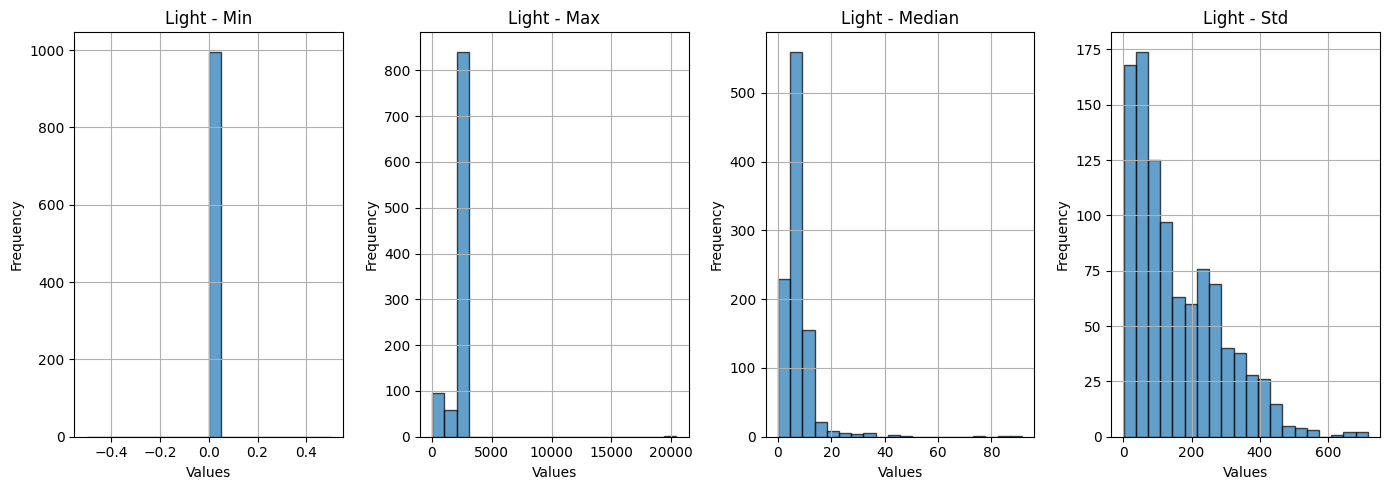

In [23]:
plot_parameter_statistics(stats_df, 'light')

### Analysis of Minimum and Maximum Light Values

- **Minimum Values**:  
  All minimum values are **0**, suggesting that all users were, at some point, in a completely dark environment. This aligns closely with real-world scenarios, such as during sleep.  

- **Maximum Values**:  
  - Most maximum values fall within the range of **0-2500**, which is consistent with typical ambient light conditions.  
  - However, a few maximum values are **close to 0**, indicating that some users might have been in complete darkness for the entire observation period.  
  - Notably, there is a single **outlier** with a value of **20,000**, raising the possibility of **sensor interference** or a **malfunction** in the light sensor.


In [24]:
stats_df['n_records'] = stats_df['enmo_count']
stats_df = stats_df.loc[:, ~stats_df.columns.str.endswith('_count')]
stats_df.to_csv('stats.csv', index=False)

In [25]:
worn_data = series_train[series_train['non-wear_flag'] == 0]

# recalculate time difference between rows and measurement_after_gap flag
worn_data['time_diff'] = (worn_data['day_time'].diff() * 86400).round(0)
worn_data['measurement_after_gap'] = worn_data['time_diff'] > expected_diff
worn_data['measurement_after_gap'].value_counts()

measurement_after_gap
False    281762
True       5417
Name: count, dtype: int64

### Analysis of No-Motion Periods

To examine periods of inactivity (when the user is resting and not active), we follow these steps:  

1. **Filter**: Select cases where **ENMO = 0**, indicating no movement by the user.  
2. **Group**: Aggregate consecutive no-motion periods to calculate the **duration of inactivity** for each instance.  

This analysis helps us understand the patterns and duration of rest periods, providing valuable insights into the user's activity behavior.


In [26]:
no_motion = worn_data['enmo'] == 0

motion_group = (
    (no_motion != no_motion.shift()) |
    (worn_data['measurement_after_gap'])
).cumsum()

no_motion_periods = worn_data[no_motion].groupby(
    motion_group
)['day_time'].agg(['min', 'max'])

no_motion_periods['duration_sec'] = (
    (no_motion_periods['max'] - no_motion_periods['min']) * 86400
).round(0).astype(int)

print(f"Min duration in seconds: {no_motion_periods['duration_sec'].min()}")
print(f"Max duration in seconds: {no_motion_periods['duration_sec'].max()}")

Min duration in seconds: 0
Max duration in seconds: 110


### Adjusting for Device Start-Up Time

Since the measurement begins **5 seconds** after the device is worn (due to start-up time), we adjust all inactivity periods by **adding 5 seconds**.  

This ensures the analysis accounts for the device’s initialization phase, providing a more accurate representation of no-motion durations.


In [27]:
no_motion_periods['duration_sec'] += 5

print("Total duration in hours:", no_motion_periods['duration_sec'].sum() / 3600)
no_motion_periods.sort_values(by='duration_sec')

Total duration in hours: 7.618055555555555


,min,max,duration_sec
11,5.784433,5.784433,5
5387,22.804225,22.804225,5
5384,22.788368,22.788368,5
5382,22.743461,22.743461,5
5380,22.649306,22.649306,5
...,...,...,...
1108,9.803993,9.804456,45
5715,23.463773,23.464294,50
4302,19.400405,19.401215,75
5719,23.465220,23.466030,75


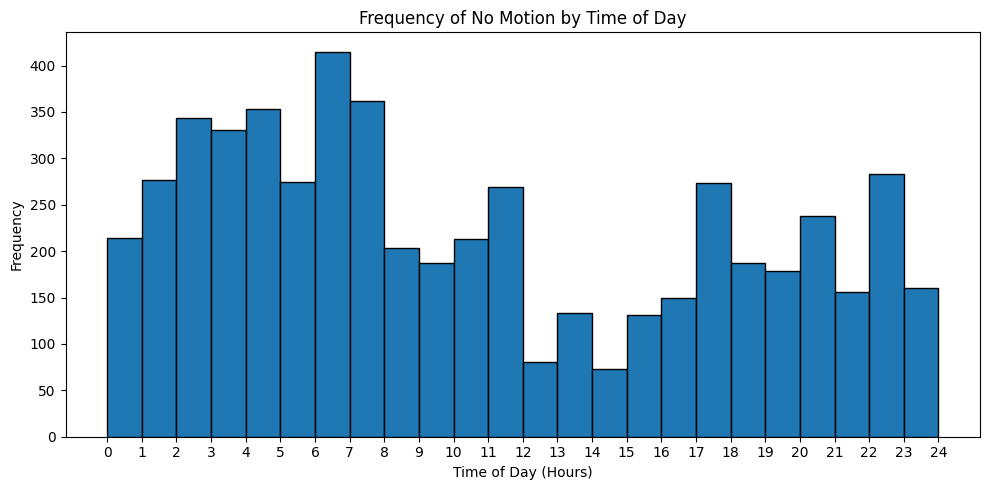

In [28]:
plt.figure(figsize=(10, 5))
plt.hist(worn_data[no_motion]['time_of_day_hours'],
         bins=24, range=(0, 24), edgecolor='black')
plt.title('Frequency of No Motion by Time of Day')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Frequency')
plt.xticks(range(0, 25))
plt.tight_layout()
plt.show()

### Observations on No-Motion Periods

The chart provides a clear and accurate representation of user activity patterns:  

- **Night and Early Morning**: Most users remain in a **no-motion state**, reflecting periods of rest or sleep.  
- **From Around 7 AM**: The no-motion periods **gradually decrease**, indicating an increase in user activity.  

The data appears to be **reliable**, and the no-motion value has potential as a useful **feature for training models** to predict user behavior or activity patterns.


Let's visually assess the stability of no-motion periodds for the participant

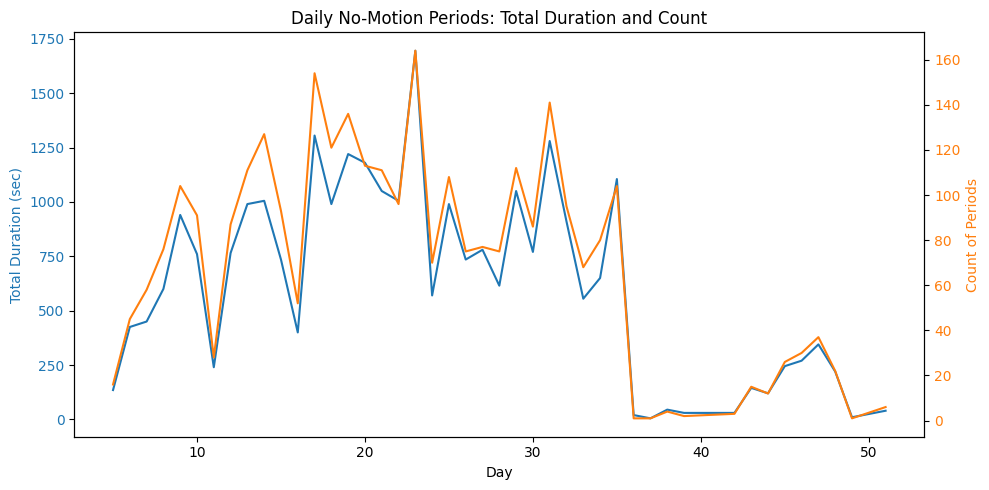

In [29]:
no_motion_periods['day'] = no_motion_periods['min'].astype(int)

daily_stats = no_motion_periods.groupby(no_motion_periods['day']) \
    .agg(total_duration=('duration_sec', 'sum'),
         count_periods=('duration_sec', 'size'))


fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Day')
ax1.set_ylabel('Total Duration (sec)', color=color)
ax1.plot(daily_stats.index, daily_stats['total_duration'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Count of Periods', color=color)
ax2.plot(daily_stats.index, daily_stats['count_periods'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Daily No-Motion Periods: Total Duration and Count')
fig.tight_layout()
plt.show()

### Analysis of Daily No-Motion Periods

This chart visualizes two key metrics related to no-motion periods on a daily basis:

- **Left Y-Axis (Blue)**: Total no-motion duration per day (in seconds).  
- **Right Y-Axis (Orange)**: Count of no-motion periods per day.  
- **X-Axis**: Represents days, showing trends over time.

#### Interpretation:

1. **High Peaks During the Early Period (Days 1–30):**  
   - A high number of no-motion periods, likely corresponding to rest, sleep, or periods of inactivity.  
   - For wearable devices or activity tracking, this reflects the users' regular daily cycles, including prolonged rest periods.  

2. **Sudden Drop Around Day 40:**  
   - **Potential Causes**:
     - Data errors or missing data, requiring a review of the data collection process.  
     - A behavioral shift, such as increased user activity during this time.  

3. **Slight Increase After Day 40:**  
   - Gradual recovery in metrics suggests users returning to their usual routines.  
   - This aligns the no-motion periods with patterns observed during the initial phase.  

---

This dual-axis chart provides a comprehensive view of daily no-motion trends, highlighting periods of regular activity, anomalies, and potential changes in user behavior.


In [30]:
features = daily_stats[['total_duration', 'count_periods']].agg(
    ['median', 'max', 'std']
).T.unstack().to_frame().T

features.columns = ['_'.join(col) for col in features.columns]

features

,median_total_duration,median_count_periods,max_total_duration,max_count_periods,std_total_duration,std_count_periods
0,632.5,75.5,1695.0,164.0,439.300373,47.204629


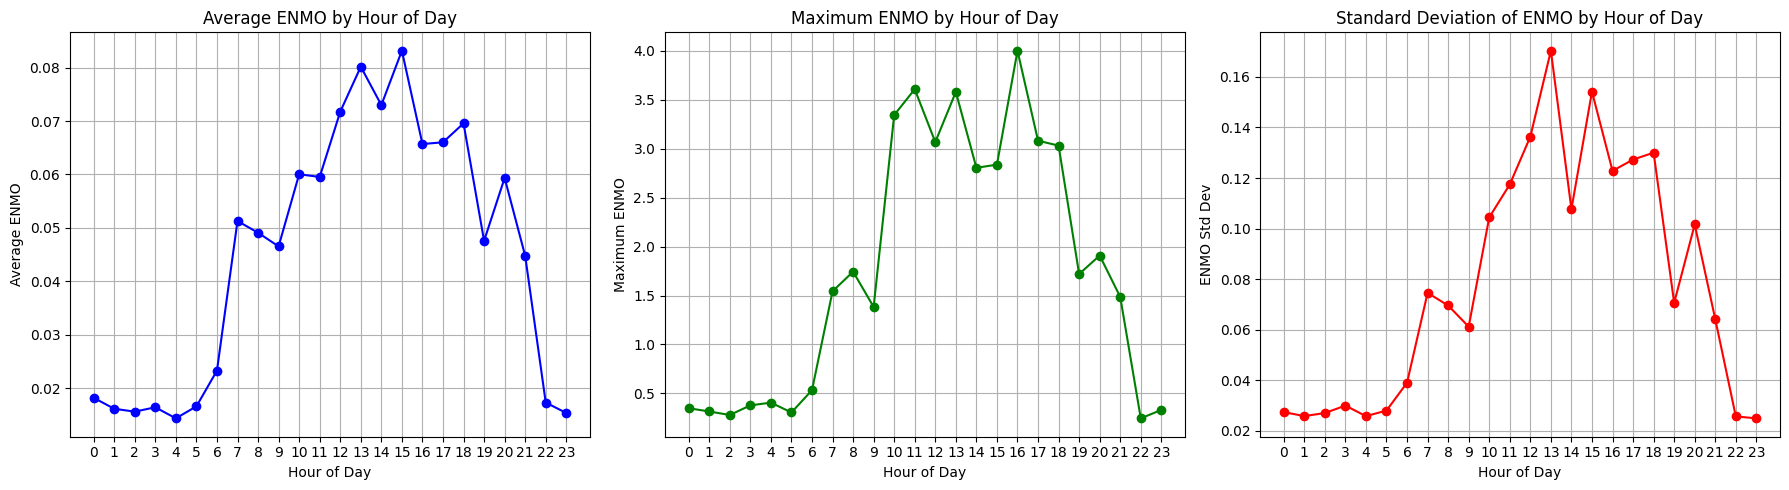

In [31]:
hourly_activity = worn_data.groupby(
    worn_data['time_of_day_hours'].astype(int)
)['enmo'].agg(['mean', 'max', 'std'])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# average ENMO
axes[0].plot(hourly_activity.index, hourly_activity['mean'], marker='o', color='blue')
axes[0].set_xticks(hourly_activity.index)
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average ENMO')
axes[0].set_title('Average ENMO by Hour of Day')
axes[0].grid(True)

# maximum ENMO
axes[1].plot(hourly_activity.index, hourly_activity['max'], marker='o', color='green')
axes[1].set_xticks(hourly_activity.index)
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Maximum ENMO')
axes[1].set_title('Maximum ENMO by Hour of Day')
axes[1].grid(True)

# standard deviation of ENMO
axes[2].plot(hourly_activity.index, hourly_activity['std'], marker='o', color='red')
axes[2].set_xticks(hourly_activity.index)
axes[2].set_xlabel('Hour of Day')
axes[2].set_ylabel('ENMO Std Dev')
axes[2].set_title('Standard Deviation of ENMO by Hour of Day')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Analysis of Children's Sleep and Activity Patterns  

## Sleep Duration  
- Children generally **sleep from 10 PM to 6 AM**, resulting in approximately **7 hours** of sleep.  
- This is **shorter than the recommended 9–12 hours** for children, which may indicate:  
  - Real-world constraints, such as school schedules or evening activities.  
  - Behavioral factors like screen time before bed or irregular sleep habits.  

## Activity Levels  
- **Peak activity** occurs during the **middle of the day**, likely coinciding with periods of:  
  - Play and outdoor activities.  
  - Learning or school-related physical engagement.  

## Data Reliability  
- The data appears **realistic**, showing expected daily activity patterns.  
- The **measurement device** seems to perform accurately, effectively capturing periods of sleep and activity.  

---  
This analysis provides insights into the daily routines and behaviors of children, which can be further studied for identifying trends or improving their health and well-being.


# Conclusions from Exploratory Data Analysis (EDA) of Time Series Data  

## Basic Observations  
1. **Device Sensitivity and Accuracy**:  
   - The device is **highly sensitive and accurate** in measuring motion, light intensity, and arm an (anglez)gles.  
   - However, **minor errors** were observed in specific cases, such as:  
     - **Unusually high light intensity** readings (potential interference).  
     - **Failure to detect motion**, leading to outliers.  

2. **User Data Duration**:  
   - Most users wore the device for a considerable period.  
   - **Data beyond day 35** shows a significant drop in records, likely due to:  
     - Data collection being deemed unnecessary.  
     - Device or user constraints.  
   - Filtering data beyond day 35 is recommended for analysis.  

3. **Battery Life**:  
   - **Battery voltage** does not impact the measurement results, and it can be considered irrelevant for feature selection.  

---

## Feature Selection for Model Training  
1. **Statistical Features**:  
   - Metrics such as:  
     - **Minimum (min), maximum (max), count, mean**, and percentiles (**25%, 50%, 75%**)  
     - For key features: **ENMO**, **anglez**, and **light**  
   - These values are reliable and provide meaningful insights, making them **suitable features for model training**.  

2. **No-Motion Periods**:  
   - The **no-motion value** accurately reflects children's behavior, particularly during rest or sleep periods.  
   - This makes it a **valuable feature** to include in the model.  

3. **Irrelevant Features**:  
   - Features such as **battery voltage** show little impact on the outcome and can be safely **discarded**.  

---

## Conclusion  
To build a robust and effective model:  
- We need to **combine tabular data with time series data** to extract the most relevant features.  
- Selecting featurcalculate es such as **ENMO, anglez, light**, and **no-motion duration** will enhance model performance.  
- Filtering unnecessary records and discarding irrelevant features (like battery 
- Filtering data beyond day 35 is recommended for analysis (will reduce outliers?)ltage) will further optimize the model.  

This approach ensures the model leverages accurate and meaningful data for training.  
